In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
import json
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

In [3]:
df = pd.read_csv('netflix_titles_2021.csv' , parse_dates = True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df['date_added'] = pd.to_datetime(df['date_added'] ,infer_datetime_format=True )
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# ***Handling Missing Values***

In [9]:
columns_to_exclude = ['date_added', 'duration']
columns_with_missing_values = [col for col in df.columns[df.isna().any()] if col not in columns_to_exclude]
print(columns_with_missing_values)

['director', 'cast', 'country', 'rating']


In [10]:
df.fillna({column : "Unavailable" for column in columns_with_missing_values} , inplace=True)
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [11]:
df[df.date_added.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unavailable,Igor Dmitriev,Unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unavailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [12]:
most_recent_dates = df['date_added'].max()
df.fillna({'date_added' : most_recent_dates} , inplace = True)

<ipython-input-12-b27c4d075e80>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.fillna({'date_added' : most_recent_dates} , inplace = True)


In [13]:
print( most_recent_dates == df[df.show_id == 's6067']['date_added'] )

6066    True
Name: date_added, dtype: bool


In [14]:
df[df.duration.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [15]:
df[df['director'] == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [16]:
df.loc[df['director'] == 'Louis C.K.' , 'duration'] = df['rating']
df[df['director'] == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [17]:
df.loc[df['director'] == 'Louis C.K.' , 'rating'] = 'Unavailable'
df[df['director'] == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


#***Visualizations***


In [18]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

<Axes: title={'center': 'Classification of shows by type'}, xlabel='type', ylabel='count'>

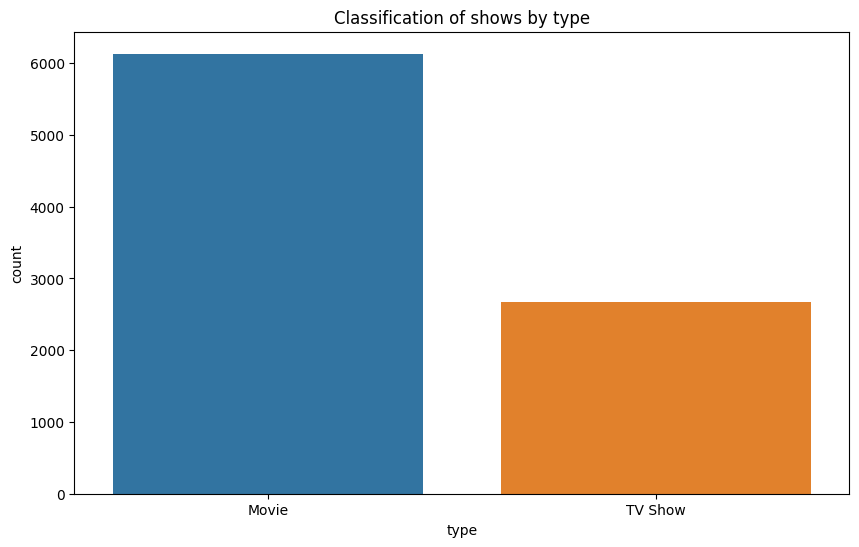

In [19]:
plt.figure(figsize=(10,6))
plt.title('Classification of shows by type')
# df.type.value_counts().plot.barh()
sns.countplot(x = 'type' , data = df)

On Netflix there are more movies than TV Shows


#***Country Analysis***


In [20]:
df.country.value_counts().head()

United States     2818
India              972
Unavailable        831
United Kingdom     419
Japan              245
Name: country, dtype: int64

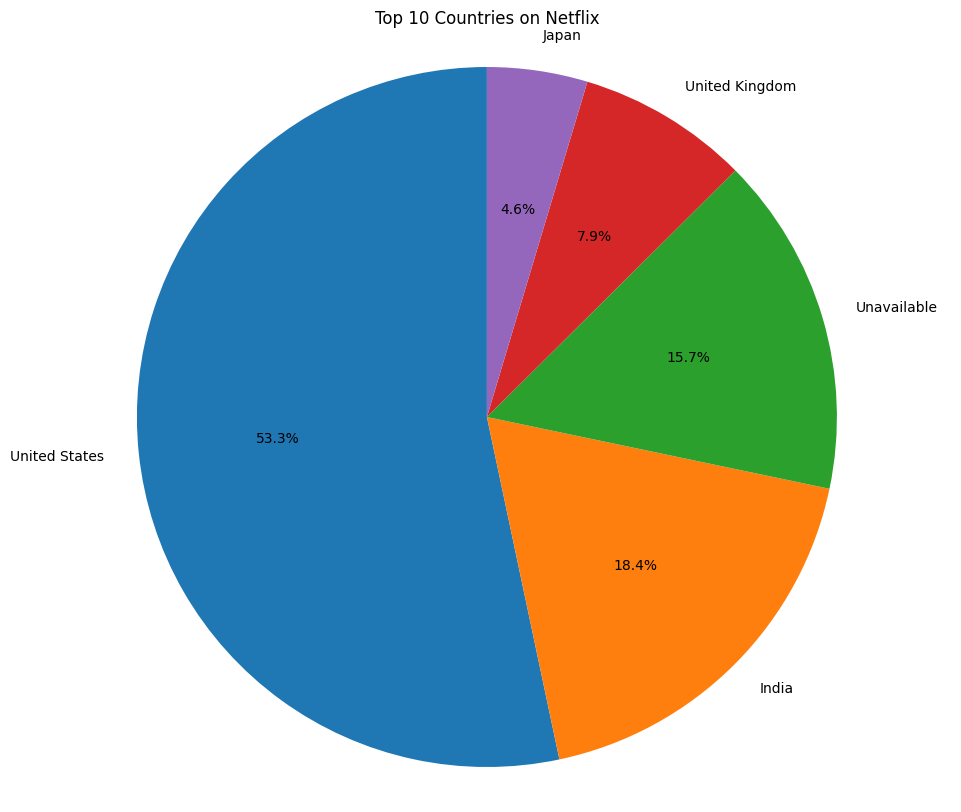

In [21]:

# Sample data (replace with your own data)
country_counts = df['country'].value_counts()[0:5]

# Create a pie plot
plt.figure(figsize=(12, 10))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Top 10 Countries on Netflix')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Most shows on Netflix are from USA

In [22]:
movie_countries = df[df['type'] == 'Movie']
tv_show_countries = df[df['type'] == 'TV Show']

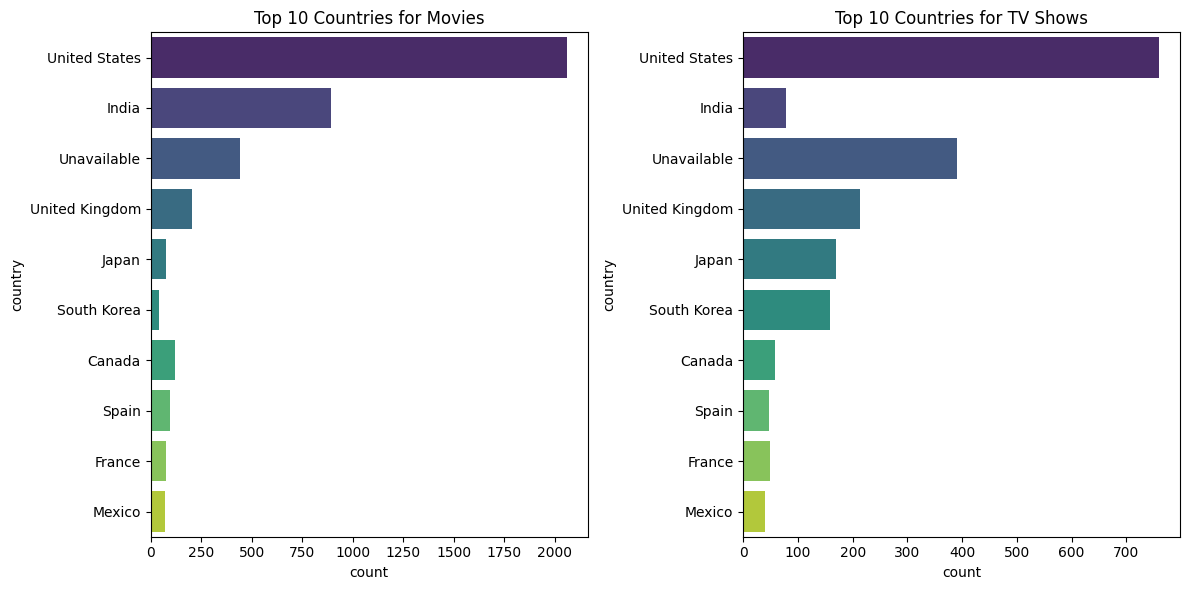

In [23]:
# Create a figure with two side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

y = "country"
order = df['country'].value_counts().index[0:10]

# Create the first count plot for movies
sns.countplot(y=y, order=order, data=movie_countries, ax=ax1 , palette = 'viridis')
ax1.set_title('Top 10 Countries for Movies')

# Create the second count plot for TV shows
sns.countplot(y=y, order=order, data=tv_show_countries, ax=ax2, palette = 'viridis')
ax2.set_title('Top 10 Countries for TV Shows')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


#**Rating Analysis**#

In [24]:
df.rating.value_counts().head()

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: rating, dtype: int64

<Axes: title={'center': 'Classification of shows by rating'}, xlabel='rating', ylabel='count'>

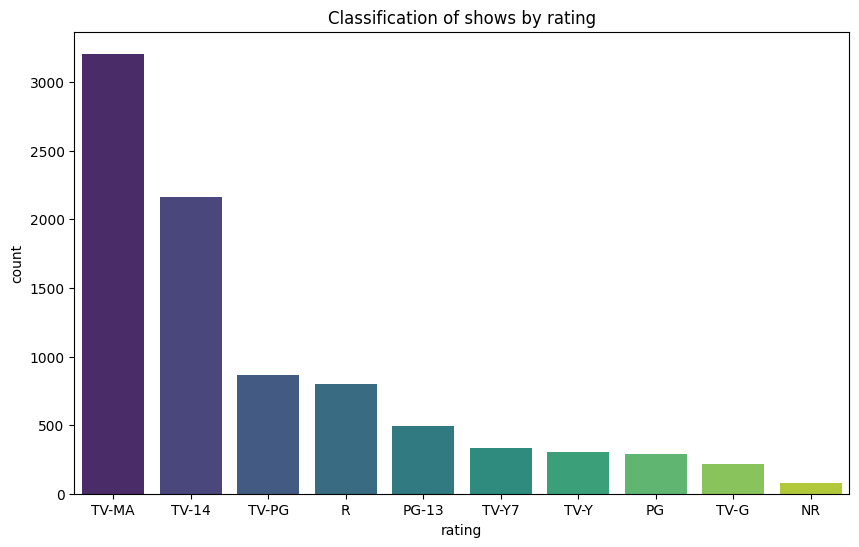

In [25]:
plt.figure(figsize=(10,6))
plt.title('Classification of shows by rating')
order = df['rating'].value_counts().index[0:10]
x = 'rating'
sns.countplot(x = x , order = order , data = df , palette = 'viridis')

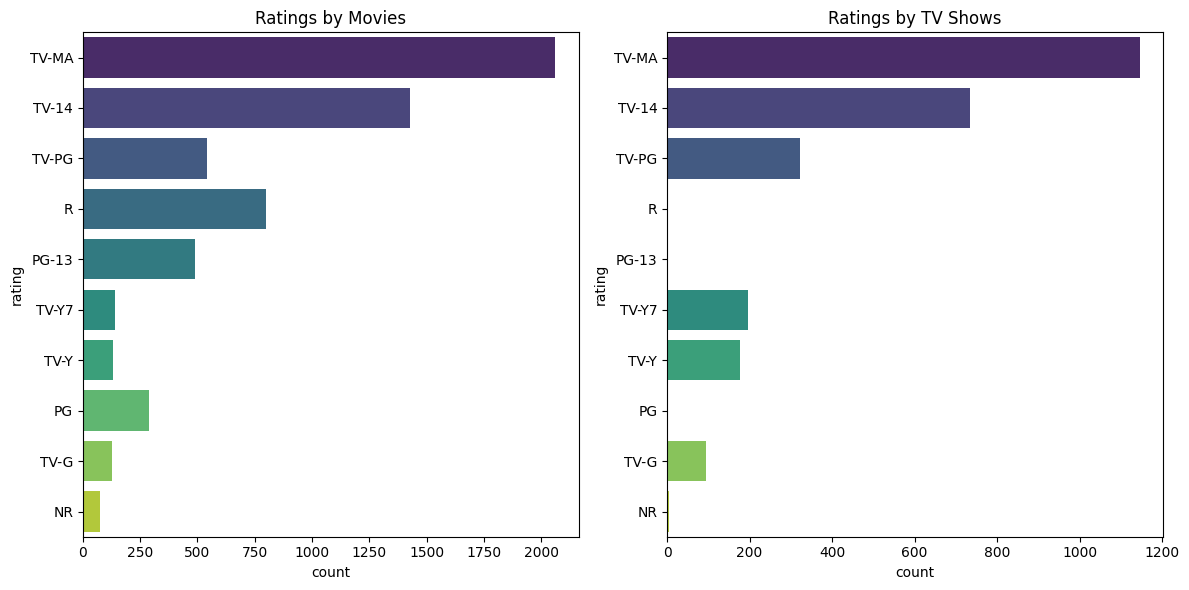

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

y = "rating"
order = df['rating'].value_counts().index[0:10]

# Create the first count plot for movie ratings
sns.countplot(y=y, order=order, data=movie_countries, ax=ax1 , palette = 'viridis')
ax1.set_title('Ratings by Movies')

# Create the second count plot for TV show ratings
sns.countplot(y=y, order=order, data=tv_show_countries, ax=ax2, palette = 'viridis')
ax2.set_title('Ratings by TV Shows')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

TV-MA is the most common rating in TV Shows and Movies

#***Duration Analysis***#

In [27]:
def convert_duration_into_number(row):
  duration = row['duration']
  duration_to_int = ''.join(duration[0:duration.index(' ')])
  return int(duration_to_int)

df['duration_simplified'] = df.apply(convert_duration_into_number, axis=1)
df['duration_simplified']

0        90
1         2
2         1
3         1
4         2
       ... 
8802    158
8803      2
8804     88
8805     88
8806    111
Name: duration_simplified, Length: 8807, dtype: int64

In [28]:
df[['duration_simplified' , 'type']].groupby('type').agg(['min','max','count','mean','std'])

duration_simplified                                 
                        min  max count       mean        std
type                                                        
Movie                     3  312  6131  99.564998  28.289504
TV Show                   1   17  2676   1.764948   1.582752

In [29]:
#check results of the previous output
filtered_df = df[(df['duration_simplified'] == 3) & (df['type'] == 'Movie')]
filtered_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_simplified
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",Unavailable,United States,2019-06-04,2014,TV-Y,3 min,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",3


In [61]:
# Create separate DataFrames for movies and TV shows
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

# Get the top 10 'duration_simplified' values for movies and TV shows
top_dur_movies = movies_df['duration_simplified'].value_counts().nlargest(10).sort_values(ascending=False)
top_dur_tv_shows = tv_shows_df['duration_simplified'].value_counts().nlargest(10).sort_values(ascending=False)

print(f'TV Shows : \n{top_dur_movies}')
print('TV Shows : \n{}'.format(top_dur_tv_shows))

TV Shows : 
90     152
94     146
97     146
93     146
91     144
95     137
96     130
92     129
102    122
98     120
Name: duration_simplified, dtype: int64
TV Shows : 
1     1793
2      425
3      199
4       95
5       65
6       33
7       23
8       17
9        9
10       7
Name: duration_simplified, dtype: int64


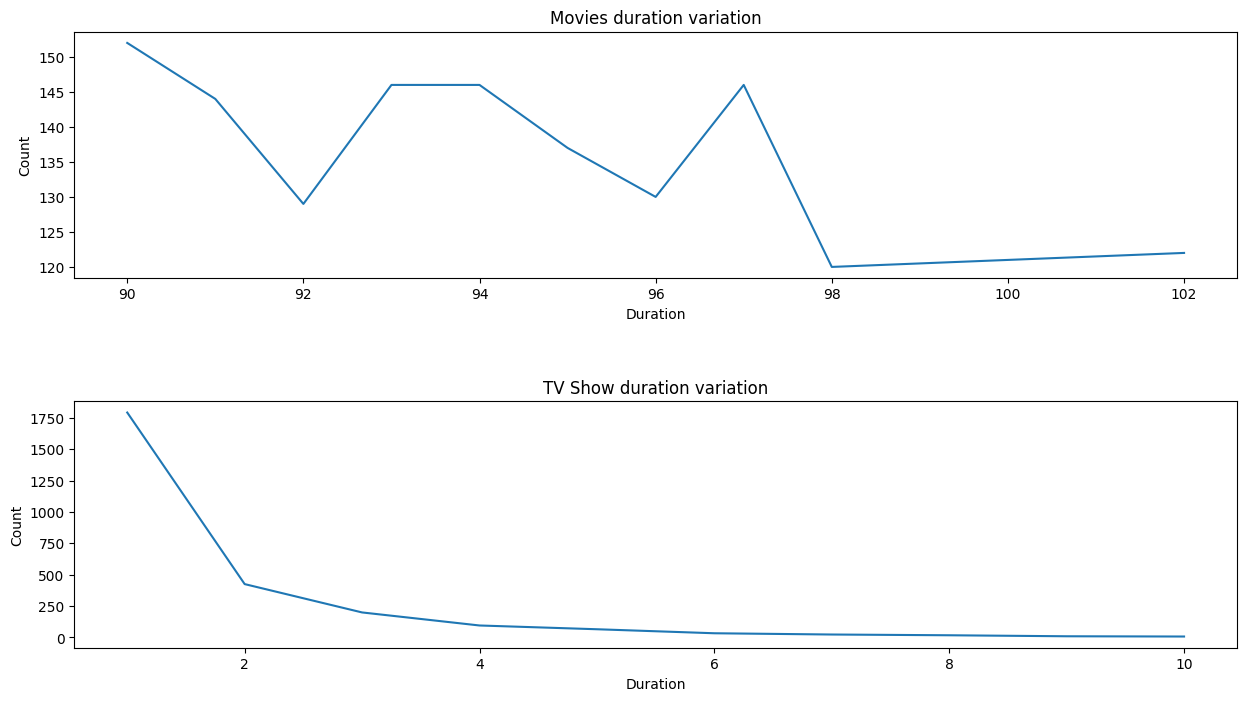

In [112]:
fig , ax = plt.subplots(2, figsize=(15,8))
ax[0].set_title('Movies duration variation')
sns.lineplot(data = top_dur_movies , ax = ax[0])
ax[1].set_title('TV Show duration variation')
sns.lineplot(data = top_dur_tv_shows , ax = ax[1])
[ax[i].set_xlabel('Duration') and ax[i].set_ylabel('Count') for i in range(2)]

plt.subplots_adjust(hspace=0.5)  # Adjust the width space between subplots
plt.show()

In [138]:
#scaling the simplified duration
df['duration_scaled'] = minmax_scaling(df['duration_simplified'] , columns = [0])
result = (df['duration_scaled'] <= 1) & (df['duration_scaled'] >= 0)
print(result.all())

True


#***Date Analysis***

In [103]:
df['release_year'].max()

2021

In [107]:
df.date_added.dt.year.head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: date_added, dtype: int64

In [108]:
release_variation = df.release_year.value_counts().nlargest(10).sort_values(ascending=False)
release_variation

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: release_year, dtype: int64

<Axes: title={'center': 'Release Variation'}, xlabel='release year', ylabel='count'>

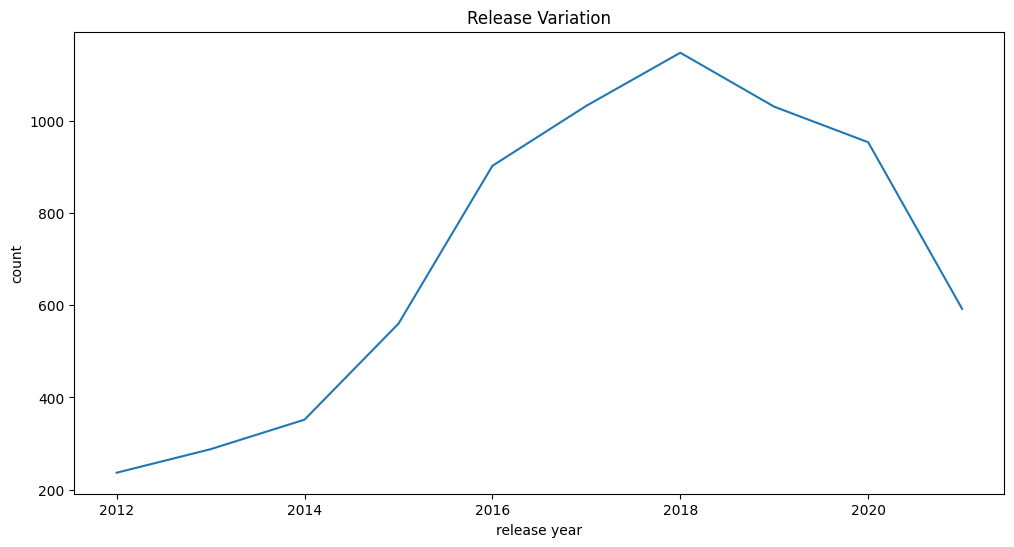

In [109]:
fig , ax = plt.subplots(figsize=(12,6))
ax.set_title('Release Variation')
ax.set_xlabel('release year')
ax.set_ylabel('count')
sns.lineplot(release_variation)

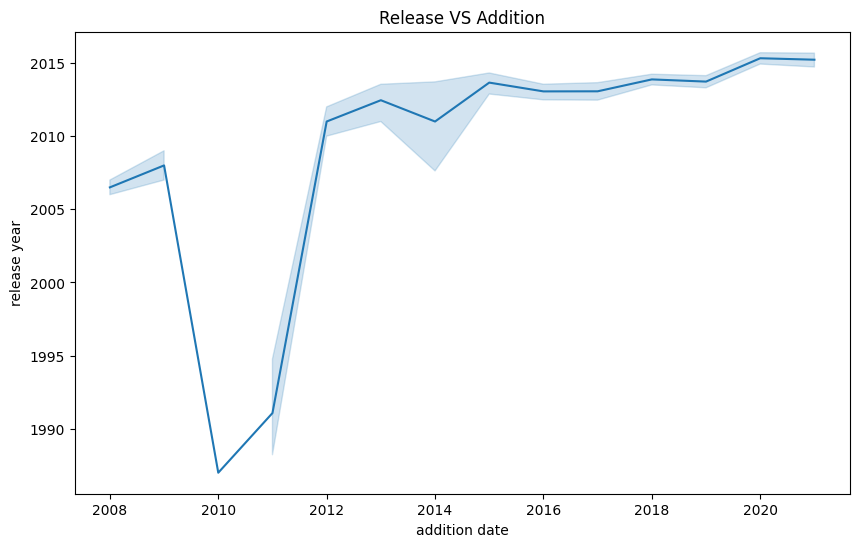

In [130]:
plt.figure(figsize=(10,6))
x =  df.date_added.dt.year
y =  df.release_year
sns.lineplot(x=x,y=y)
plt.title('Release VS Addition')
plt.xlabel('addition date')
plt.ylabel('release year')
plt.show()

<ipython-input-147-8d3cff672a6d>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_matrix = heatmap_data.pivot('year', 'month', 'count')


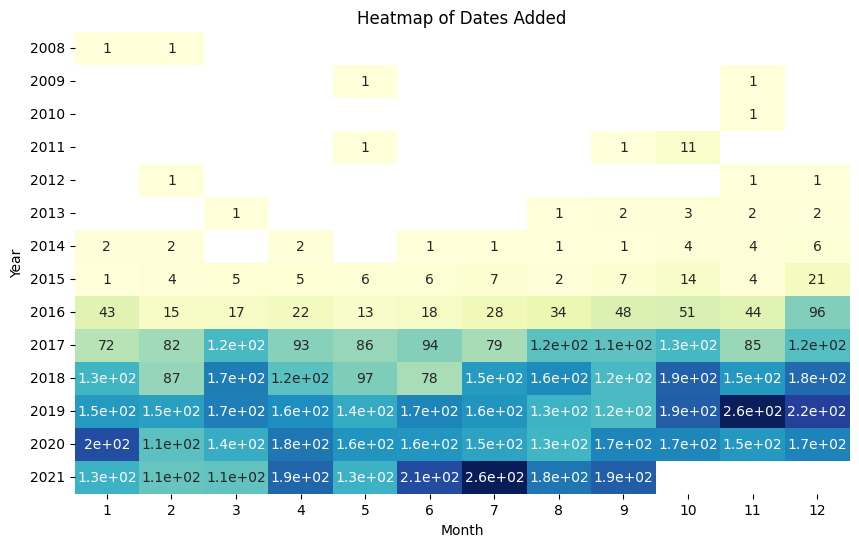

In [147]:
# Extract year and month from the 'date_added' column
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month

# Group by year and month and count the occurrences
heatmap_data = df.groupby(['year', 'month']).size().reset_index(name='count')

# Pivot the data to create a 2D array-like structure for the heatmap
heatmap_matrix = heatmap_data.pivot('year', 'month', 'count')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_matrix, cmap='YlGnBu', annot=True, cbar=False)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Heatmap of Dates Added')

# Show the plot
plt.show()